In [370]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [371]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [372]:
train = pd.read_csv ('https://raw.githubusercontent.com/claradelatorre/Test2ML-Classifier/main/train.csv')


In [373]:
test = pd.read_csv ('https://raw.githubusercontent.com/claradelatorre/Test2ML-Classifier/main/test.csv')

In [374]:
#train.drop(['ID'] ,axis= 1 , inplace = True)

In [375]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  int64  
 1   Customer_ID               80000 non-null  int64  
 2   Month                     80000 non-null  int64  
 3   Name                      80000 non-null  object 
 4   Age                       80000 non-null  float64
 5   SSN                       80000 non-null  float64
 6   Occupation                80000 non-null  object 
 7   Annual_Income             80000 non-null  float64
 8   Monthly_Inhand_Salary     80000 non-null  float64
 9   Num_Bank_Accounts         80000 non-null  float64
 10  Num_Credit_Card           80000 non-null  float64
 11  Interest_Rate             80000 non-null  float64
 12  Num_of_Loan               80000 non-null  float64
 13  Type_of_Loan              80000 non-null  object 
 14  Delay_

In [376]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,43161,3985,4,Lawrencez,40.0,856431180.0,Accountant,97384.44,8167.370000,1.0,...,Good,405.45,32.643281,336.0,No,77.284943,53.714219,High_spent_Large_value_payments,847.172909,Standard
1,40663,49494,2,Mohammedr,39.0,417453942.0,Writer,31369.58,2607.131667,8.0,...,Bad,4259.91,39.375507,144.0,Yes,171.748418,44.990811,High_spent_Large_value_payments,280.855383,Standard
2,111059,2925,6,Alistairn,17.0,499528888.0,Writer,30171.86,2772.321667,6.0,...,Bad,3406.51,34.039021,123.0,Yes,205.403926,40.781489,High_spent_Large_value_payments,247.322615,Standard
3,72139,21358,2,Dinesh Naire,22.0,859449371.0,Doctor,13100.02,1246.668333,7.0,...,Standard,727.29,34.747262,129.0,Yes,41.177132,23.005463,Low_spent_Large_value_payments,298.156832,Standard
4,119841,21221,4,Bakerg,26.0,485239890.0,Doctor,62313.54,5120.795000,6.0,...,Standard,817.64,24.545394,122.0,NM,196.679642,63.346750,Low_spent_Medium_value_payments,152.669902,Standard


In [377]:
#Eliminamos datos inútiles

train.drop(['Customer_ID','Name','SSN'] ,axis= 1 , inplace = True)

In [378]:
train.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,43161,4,40.0,Accountant,97384.44,8167.370000,1.0,3.0,8.0,1.0,...,Good,405.45,32.643281,336.0,No,77.284943,53.714219,High_spent_Large_value_payments,847.172909,Standard
1,40663,2,39.0,Writer,31369.58,2607.131667,8.0,9.0,27.0,8.0,...,Bad,4259.91,39.375507,144.0,Yes,171.748418,44.990811,High_spent_Large_value_payments,280.855383,Standard
2,111059,6,17.0,Writer,30171.86,2772.321667,6.0,7.0,30.0,9.0,...,Bad,3406.51,34.039021,123.0,Yes,205.403926,40.781489,High_spent_Large_value_payments,247.322615,Standard
3,72139,2,22.0,Doctor,13100.02,1246.668333,7.0,5.0,6.0,5.0,...,Standard,727.29,34.747262,129.0,Yes,41.177132,23.005463,Low_spent_Large_value_payments,298.156832,Standard
4,119841,4,26.0,Doctor,62313.54,5120.795000,6.0,2.0,18.0,4.0,...,Standard,817.64,24.545394,122.0,NM,196.679642,63.346750,Low_spent_Medium_value_payments,152.669902,Standard


In [379]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  int64  
 1   Month                     80000 non-null  int64  
 2   Age                       80000 non-null  float64
 3   Occupation                80000 non-null  object 
 4   Annual_Income             80000 non-null  float64
 5   Monthly_Inhand_Salary     80000 non-null  float64
 6   Num_Bank_Accounts         80000 non-null  float64
 7   Num_Credit_Card           80000 non-null  float64
 8   Interest_Rate             80000 non-null  float64
 9   Num_of_Loan               80000 non-null  float64
 10  Type_of_Loan              80000 non-null  object 
 11  Delay_from_due_date       80000 non-null  float64
 12  Num_of_Delayed_Payment    80000 non-null  float64
 13  Changed_Credit_Limit      80000 non-null  float64
 14  Num_Cr

In [380]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        20000 non-null  int64  
 1   Customer_ID               20000 non-null  int64  
 2   Month                     20000 non-null  int64  
 3   Name                      20000 non-null  object 
 4   Age                       20000 non-null  float64
 5   SSN                       20000 non-null  float64
 6   Occupation                20000 non-null  object 
 7   Annual_Income             20000 non-null  float64
 8   Monthly_Inhand_Salary     20000 non-null  float64
 9   Num_Bank_Accounts         20000 non-null  float64
 10  Num_Credit_Card           20000 non-null  float64
 11  Interest_Rate             20000 non-null  float64
 12  Num_of_Loan               20000 non-null  float64
 13  Type_of_Loan              20000 non-null  object 
 14  Delay_

In [381]:
# from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()
# for column in train.columns:
#   if train[column].dtypes == 'object':
#     train[column] = ordinal_encoder.fit_transform(train[[column]])

# for column in test.columns:
#   if test[column].dtypes == 'object':
#     test[column] = ordinal_encoder.fit_transform(test[[column]])

In [382]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()

train[["Occupation","Type_of_Loan","Credit_Mix","Payment_of_Min_Amount","Payment_Behaviour","Credit_Score"]]=ordinal_encoder.fit_transform(train[["Occupation","Type_of_Loan","Credit_Mix","Payment_of_Min_Amount","Payment_Behaviour","Credit_Score"]])
test[["Name","Occupation","Type_of_Loan","Credit_Mix","Payment_of_Min_Amount","Payment_Behaviour"]]=ordinal_encoder.fit_transform(test[["Name","Occupation","Type_of_Loan","Credit_Mix","Payment_of_Min_Amount","Payment_Behaviour"]])

In [383]:
#Separamos las variables.
#Variable objetivo:
y = train.iloc[:,-1]
y

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
79995    2.0
79996    1.0
79997    2.0
79998    1.0
79999    0.0
Name: Credit_Score, Length: 80000, dtype: float64

In [384]:
#Demás variables:
X = train.iloc[:,0:23]
X

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour
0,43161,4,40.0,0.0,97384.44,8167.370000,1.0,3.0,8.0,1.0,...,0.52,3.0,1.0,405.45,32.643281,336.0,1.0,77.284943,53.714219,0.0
1,40663,2,39.0,14.0,31369.58,2607.131667,8.0,9.0,27.0,8.0,...,19.70,6.0,0.0,4259.91,39.375507,144.0,2.0,171.748418,44.990811,0.0
2,111059,6,17.0,14.0,30171.86,2772.321667,6.0,7.0,30.0,9.0,...,23.49,10.0,0.0,3406.51,34.039021,123.0,2.0,205.403926,40.781489,0.0
3,72139,2,22.0,3.0,13100.02,1246.668333,7.0,5.0,6.0,5.0,...,10.64,8.0,2.0,727.29,34.747262,129.0,2.0,41.177132,23.005463,3.0
4,119841,4,26.0,3.0,62313.54,5120.795000,6.0,2.0,18.0,4.0,...,12.82,9.0,2.0,817.64,24.545394,122.0,0.0,196.679642,63.346750,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,42636,7,50.0,10.0,107761.29,9047.107500,4.0,5.0,9.0,0.0,...,14.56,3.0,2.0,34.09,41.899992,211.0,2.0,0.000000,150.220682,0.0
79996,114031,2,33.0,12.0,16218.32,1098.526667,6.0,6.0,21.0,5.0,...,8.98,6.0,0.0,4466.33,24.275710,98.0,0.0,64.533114,34.457893,2.0
79997,85991,6,25.0,4.0,29374.77,2377.897500,3.0,7.0,6.0,2.0,...,16.65,7.0,2.0,1189.37,38.439021,241.0,0.0,40.264074,22.234178,1.0
79998,21240,7,15.0,8.0,43782.45,3543.537500,6.0,9.0,25.0,8.0,...,1.88,12.0,0.0,3468.25,24.233841,85.0,2.0,240.664739,42.839562,3.0


In [385]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X, y)
mutual_info

array([6.29773998e-01, 3.05877818e-04, 2.22292290e-02, 0.00000000e+00,
       6.05686874e-01, 5.99640288e-01, 1.02779742e-01, 1.09465971e-01,
       1.66211148e-01, 8.66014500e-02, 3.27375210e-01, 1.17766276e-01,
       8.76020618e-02, 1.05542823e-01, 1.16851293e-01, 1.91307903e-01,
       5.96269243e-01, 0.00000000e+00, 1.04565698e-01, 1.11044718e-01,
       5.46157442e-01, 5.99022691e-01, 5.56066442e-03])

In [386]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

ID                          0.629774
Annual_Income               0.605687
Monthly_Inhand_Salary       0.599640
Amount_invested_monthly     0.599023
Outstanding_Debt            0.596269
Total_EMI_per_month         0.546157
Type_of_Loan                0.327375
Credit_Mix                  0.191308
Interest_Rate               0.166211
Delay_from_due_date         0.117766
Num_Credit_Inquiries        0.116851
Payment_of_Min_Amount       0.111045
Num_Credit_Card             0.109466
Changed_Credit_Limit        0.105543
Credit_History_Age          0.104566
Num_Bank_Accounts           0.102780
Num_of_Delayed_Payment      0.087602
Num_of_Loan                 0.086601
Age                         0.022229
Payment_Behaviour           0.005561
Month                       0.000306
Credit_Utilization_Ratio    0.000000
Occupation                  0.000000
dtype: float64

<AxesSubplot: >

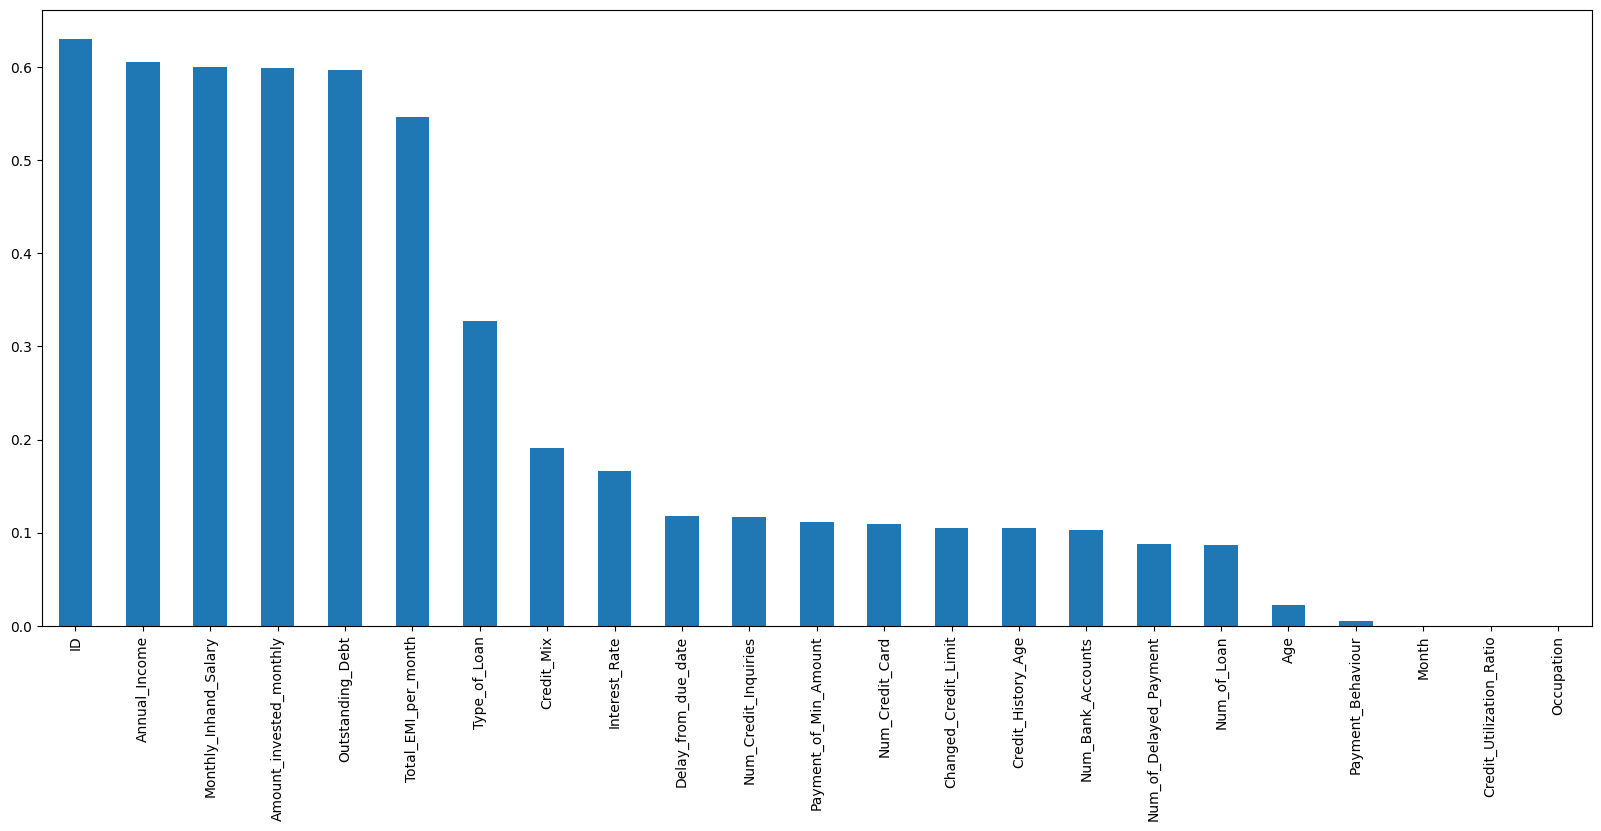

In [387]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [388]:
train.drop(['Month','Occupation','Credit_Utilization_Ratio','Payment_Behaviour'] ,axis= 1 , inplace = True)

In [389]:
train.head(5)

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,43161,40.0,97384.44,8167.370000,1.0,3.0,8.0,1.0,1410.0,20.0,...,0.52,3.0,1.0,405.45,336.0,1.0,77.284943,53.714219,847.172909,2.0
1,40663,39.0,31369.58,2607.131667,8.0,9.0,27.0,8.0,2528.0,30.0,...,19.70,6.0,0.0,4259.91,144.0,2.0,171.748418,44.990811,280.855383,2.0
2,111059,17.0,30171.86,2772.321667,6.0,7.0,30.0,9.0,5143.0,49.0,...,23.49,10.0,0.0,3406.51,123.0,2.0,205.403926,40.781489,247.322615,2.0
3,72139,22.0,13100.02,1246.668333,7.0,5.0,6.0,5.0,811.0,6.0,...,10.64,8.0,2.0,727.29,129.0,2.0,41.177132,23.005463,298.156832,2.0
4,119841,26.0,62313.54,5120.795000,6.0,2.0,18.0,4.0,520.0,27.0,...,12.82,9.0,2.0,817.64,122.0,0.0,196.679642,63.346750,152.669902,2.0


In [390]:
x = train.drop('Credit_Score',axis=1).values
y = train['Credit_Score'].values
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)
#print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

In [391]:
knn = KNeighborsClassifier(n_neighbors=7)

In [392]:
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [393]:
knn_score_train=knn.score(x_train , y_train)
knn_score_train

0.8027857142857143

In [394]:
knn_score_test=knn.score(x_test , y_test)
knn_score_test

0.6980833333333333

In [395]:
#Para balancear los datos:
SMT = SMOTE()
x_SMT, y_SMT = SMT.fit_resample(x,y)
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_SMT, y_SMT, test_size=0.15, random_state=42)

In [396]:
knn = KNeighborsClassifier(n_neighbors=7)

In [397]:
knn.fit(x_train_smote, y_train_smote)


KNeighborsClassifier(n_neighbors=7)

In [398]:
knn_score_train_smote=knn.score(x_train_smote , y_train_smote)
knn_score_train_smote

0.8849770451905525

In [399]:
knn_score_test_smote=knn.score(x_test_smote , y_test_smote)
knn_score_test_smote

0.846262341325811

In [400]:
x_ids=test['ID'].values

In [401]:
test.drop(columns=['ID','Name','SSN','Month','Occupation','Credit_Utilization_Ratio','Payment_Behaviour'],inplace=True)
pred=knn.predict(test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [402]:
pred

array([1., 1., 2., ..., 1., 1., 1.])

In [404]:
results=pd.DataFrame(list(zip(x_ids,pred)),columns=['ID', 'Credit_Score'])

In [409]:
results

,ID,Credit_Score
0,99246,1.0
1,90071,1.0
2,64375,2.0
3,142441,0.0
4,135010,1.0
...,...,...
19995,126990,0.0
19996,128347,2.0
19997,88941,1.0
19998,89599,1.0


In [410]:
results[['Credit_Score']]=ordinal_encoder.inverse_transform(test[['Credit_Score']])

KeyError: "None of [Index(['Credit_Score'], dtype='object')] are in the [columns]"